# Notebook Imports

In [83]:
# Some of the code is from sklearn documentation
# https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_boston.html

# from sklearn.datasets import load_boston DEPRECATED
# Data was instead obtained from Kaggle: https://www.kaggle.com/datasets/abhijithudayakumar/the-boston-housing-dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

# Gather Data

[Source: Original research paper](https://www.law.berkeley.edu/files/Hedonic.PDF)


[Boston Kaggle Dataset](https://www.kaggle.com/datasets/abhijithudayakumar/the-boston-housing-dataset)

In [2]:
cali_dataset = fetch_california_housing()
dir(cali_dataset)
print(cali_dataset.DESCR) # This shows the source of the data


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Data points and features

In [3]:
cali_dataset.data.shape # chaining notation of attributes

(20640, 8)

In [4]:
cali_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
# Actual prices ($100,000)
cali_dataset.target

## Boston dataset prices = MEDV column
## Price is in ($1,000)

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Data exploration with Pandas dataframes

In [6]:
# This is Boston Data
data = pd.read_csv('boston.csv')

# Numpy array
# data = pd.DataFrame(data=cali_dataset.data, columns=cali_dataset.feature_names)

# Add colum with the price (target)
# data['PRICE'] = cali_dataset.target

In [7]:
# The top rows look like this
data.head()
# The bottom ros look like this
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

In [8]:
data.count() # Shows the number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

## Cleaning data - check for missing values

In [9]:
# Shows if columns have missing valuse
pd.isnull(data).any()
# pd.isnull(boston_data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [10]:
# Shows infomation about each column
data.info()
# boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Visualizing Data - Histograms, Distributions, and Bar Charts

In [11]:
# import matplotlib.pyplot as plt
# %matplotlib inline

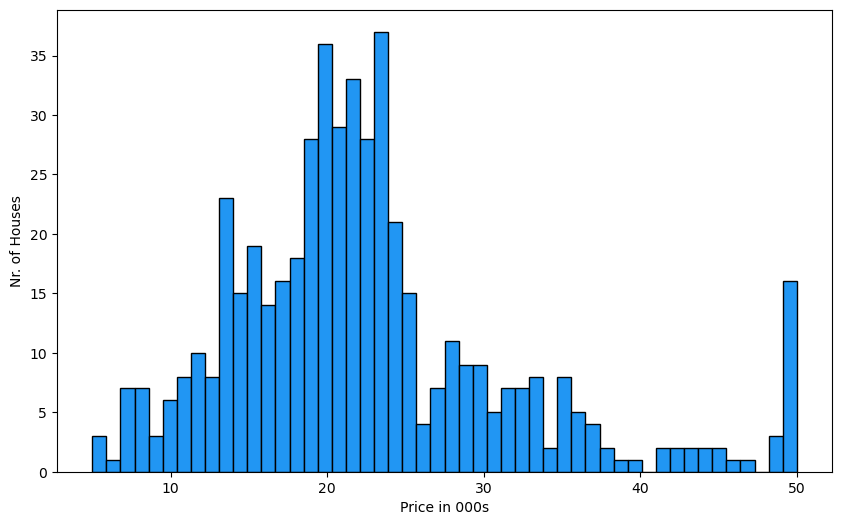

In [12]:
# Histogram of house prices
plt.figure(figsize=(10,6))
plt.hist(data['MEDV'], bins=50, ec='black', color='#2196f3') # bins set how granular the histogram is
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

In [13]:
#import seaborn as sns

C:\Users\tanic\AppData\Local\Temp\ipykernel_22412\951785770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], bins=50, hist=True, kde=False, color='#FF7F00')


<function matplotlib.pyplot.show(close=None, block=None)>

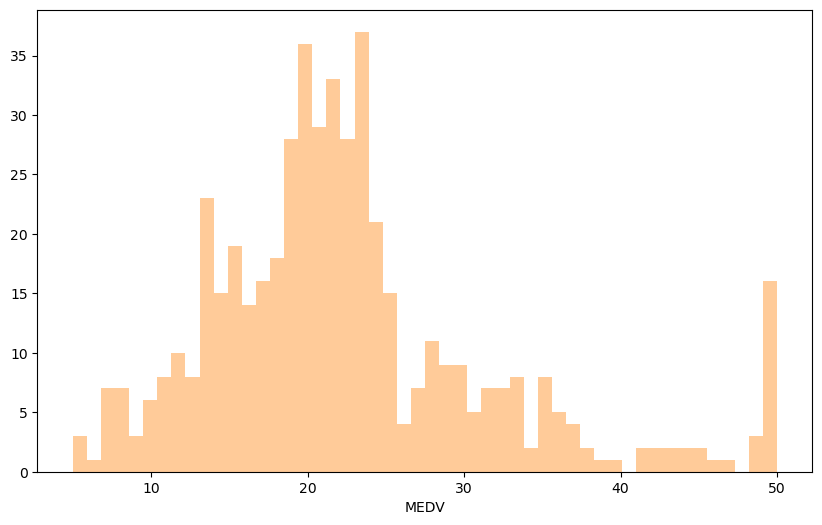

In [14]:
# Shows the Probability Density Function (PDF)
# Histogram of house prices
plt.figure(figsize=(10,6))
sns.distplot(data['MEDV'], bins=50, hist=True, kde=False, color='#FF7F00')
plt.show

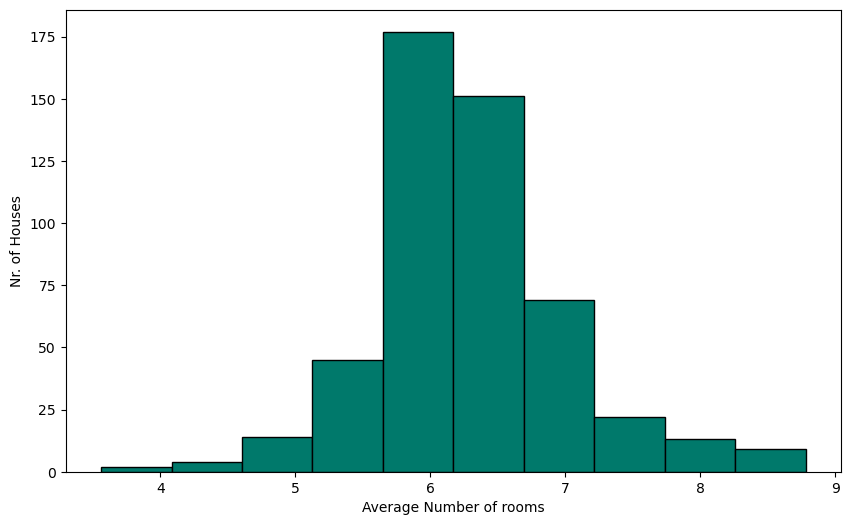

In [15]:
# Histogram of number of rooms per house
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color='#00796b') # bins set how granular the histogram is
plt.xlabel('Average Number of rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [16]:
data['RM'].mean()

6.284634387351779

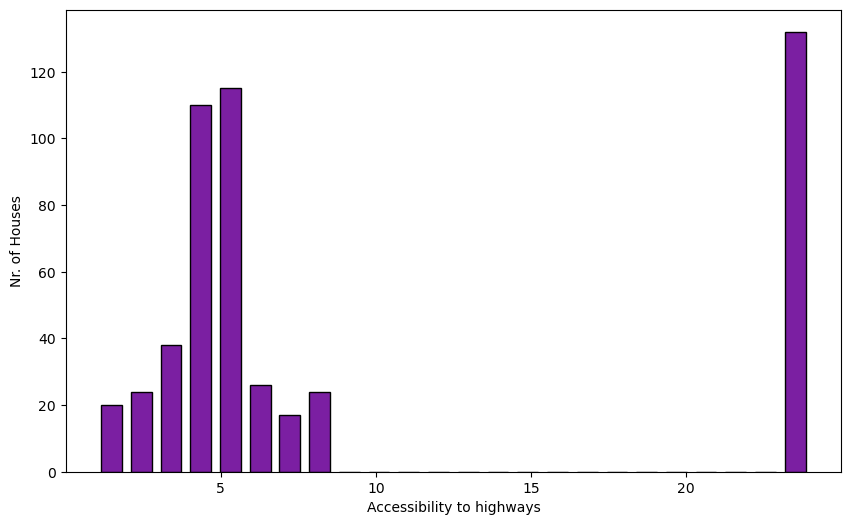

In [17]:
# Challenge: Create a meaningful histogram for RAD using matplotlib in rotal blue

# Histogram of RAD
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.7) # bins set how granular the histogram is
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [18]:
# How many observations in pariticular column have unique values
data['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

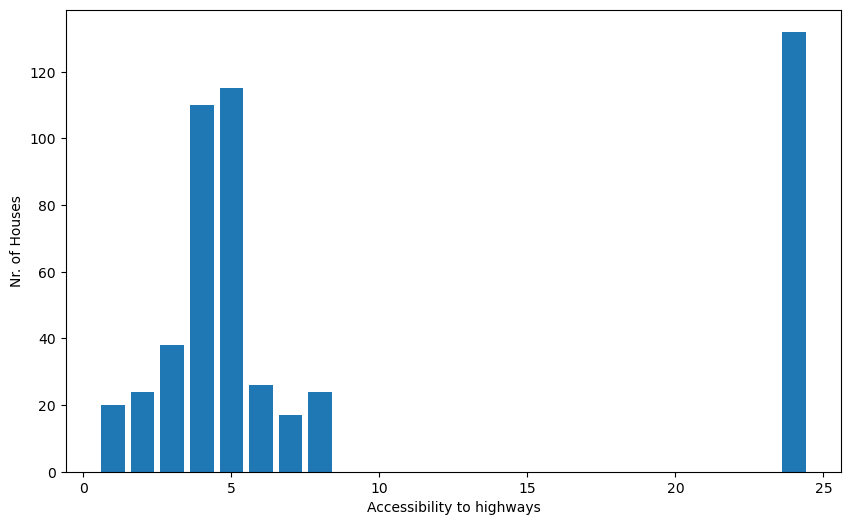

In [19]:
# No bins needed. Similar to the plot above
frequency = data['RAD'].value_counts()
# type(frequency)

# frequency.index
# frequency.axes[0] # row axes labels
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [20]:
# How many houses are next to the river? 
data['CHAS'].value_counts()
# 35 houses
# THis is a Dummy Variable 

CHAS
0    471
1     35
Name: count, dtype: int64

## Descriptive Statistics

In [21]:
data['MEDV'].min()

5.0

In [22]:
data['MEDV'].max()

50.0

In [23]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [24]:
data.max()


CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [25]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [26]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

In [27]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho_{XY} = corr(X,Y)$$
## $$ -1 \leq \rho _{XY} \leq +1.0 $$

In [28]:
# Calculate correlation between two columns/series
data['MEDV'].corr(data['RM'])

0.695359947071539

In [29]:
data['MEDV'].corr(data['PTRATIO'])

-0.5077866855375615

In [30]:
# Shows correlation between all columns in a dataframe
data.corr() # Pearson Correlation Coefficients 

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [31]:
# Creates an array of zeros with the same shape as the argument
mask = np.zeros_like(data.corr())

# Obtain indeces of top triangle of array
triangle_indeces = np.triu_indices_from(mask)
mask[triangle_indeces] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

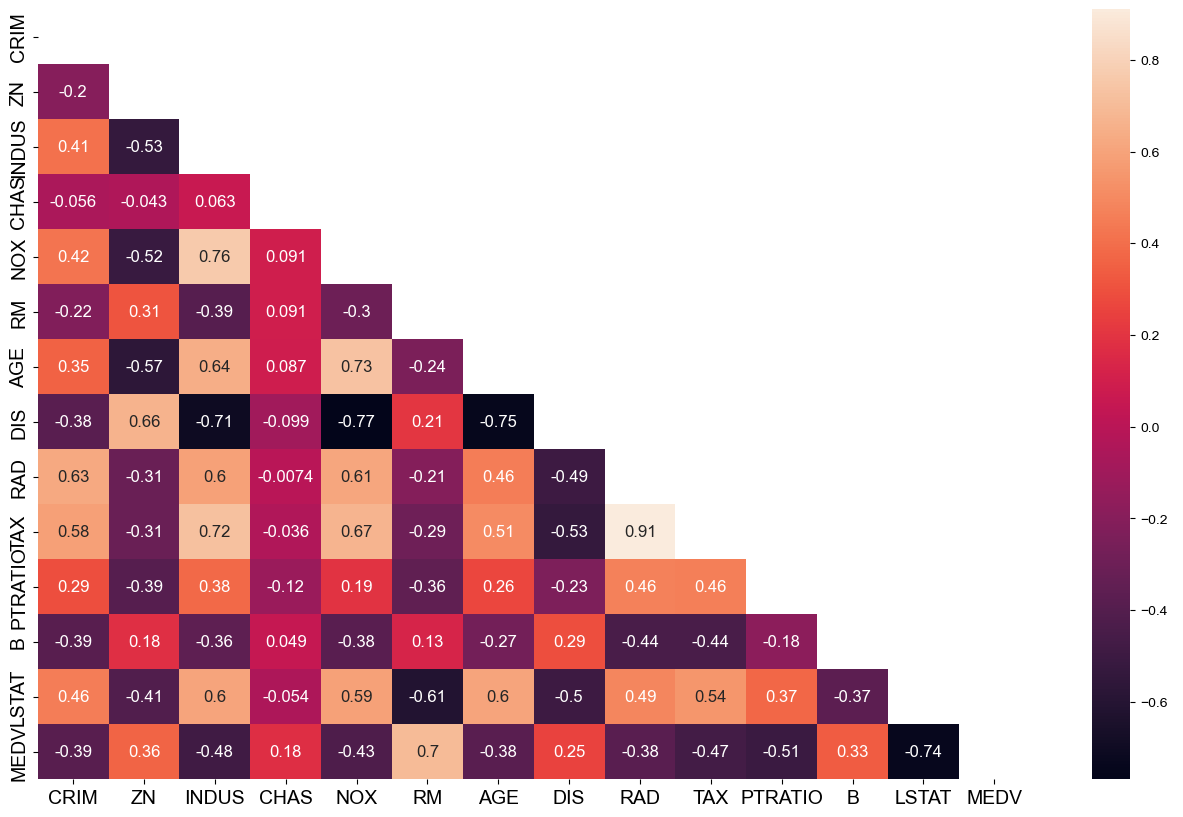

In [32]:
# Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':12})
sns.set_style('dark')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Advanced Visualizations

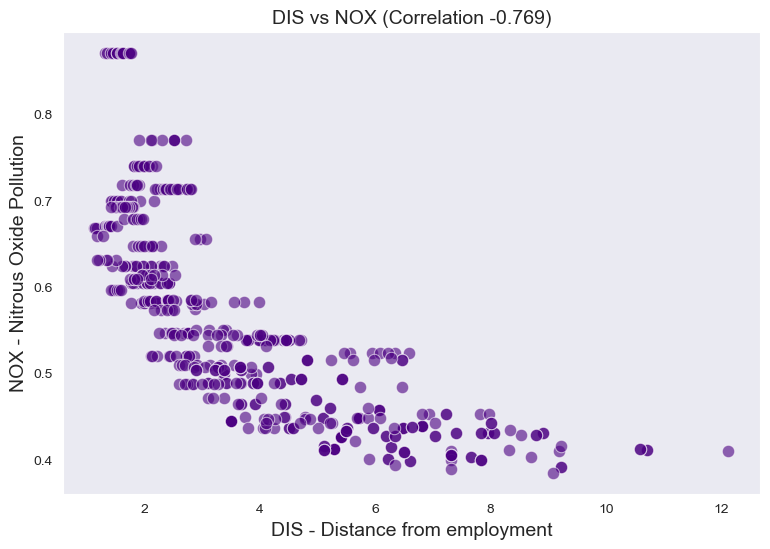

In [33]:
# Challenge: picture the relationship between pollutiion and distance in your head. 
# Then create a scatter plot between DIS and NOX

plt.figure(figsize=(9,6))
nox_dis_correlation = round(data['DIS'].corr(data['NOX']), 3)
sns.scatterplot(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_correlation})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitrous Oxide Pollution', fontsize=14)
plt.show()

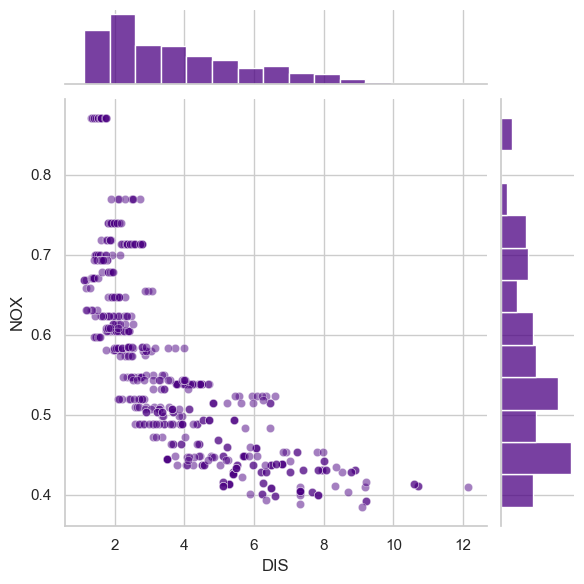

In [34]:
# Seaborn builds upon matplotlib
sns.set_theme() # Resets styling to default if no aruments are passed
sns.set_context('notebook') # template for plot scaling
sns.set_style('whitegrid') # Sets new styling
sns.jointplot(x=data['DIS'], y=data['NOX'], color='indigo', joint_kws={'alpha':0.5})
plt.show()

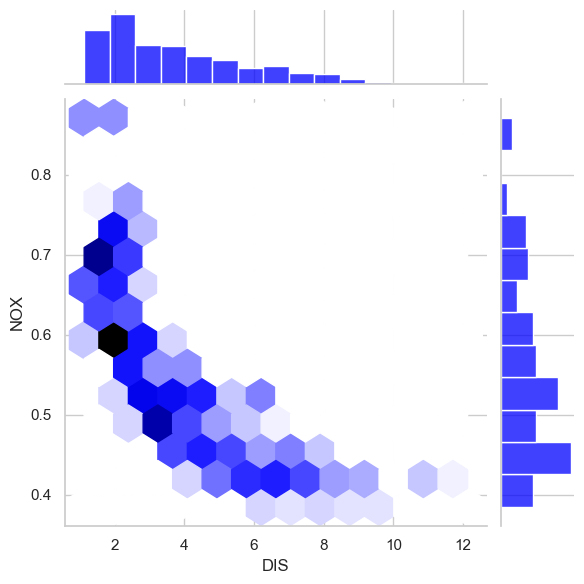

In [35]:
# Joint Plot v.2
# Seaborn builds upon matplotlib
sns.set_theme() # Resets styling to default if no aruments are passed
sns.set_context('notebook') # template for plot scaling
sns.set_style('whitegrid') # Sets new styling
sns.jointplot(x=data['DIS'], y=data['NOX'], color='blue', kind='hex')
plt.show()

## Working with Seaborn Pairplots & Jupyter Microbenching Techniques

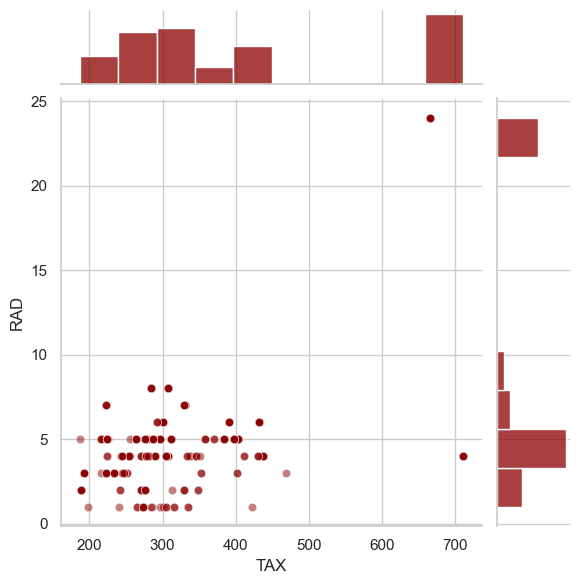

In [36]:
# Correlation values can be misleading. 
# In this example, there is an outlier
# Seaborn builds upon matplotlib
sns.set_theme() # Resets styling to default if no aruments are passed
sns.set_context('notebook') # template for plot scaling
sns.set_style('whitegrid') # Sets new styling
sns.jointplot(x=data['TAX'], y=data['RAD'], color='darkred', joint_kws={'alpha':0.5})
plt.show()

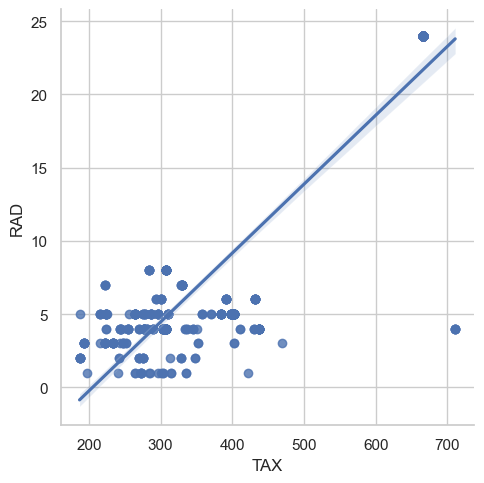

In [37]:
# adds a linear regression line using seaborn
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

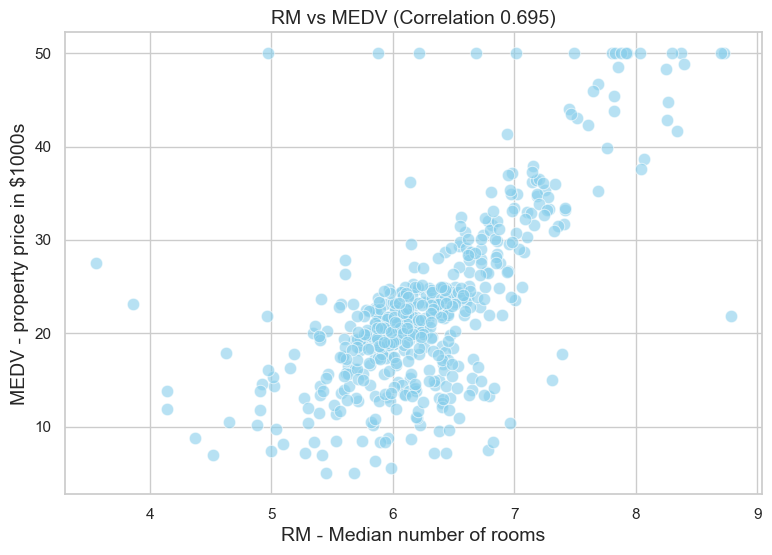

In [38]:
# Challenge: Create a scatter plot between the house prices and the number of rooms (RM)


plt.figure(figsize=(9,6))
correlation = round(data['RM'].corr(data['MEDV']), 3)
sns.scatterplot(x=data['RM'], y=data['MEDV'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs MEDV (Correlation {correlation})', fontsize=14)
plt.xlabel('RM - Median number of rooms', fontsize=14)
plt.ylabel('MEDV - property price in $1000s', fontsize=14)
plt.show()

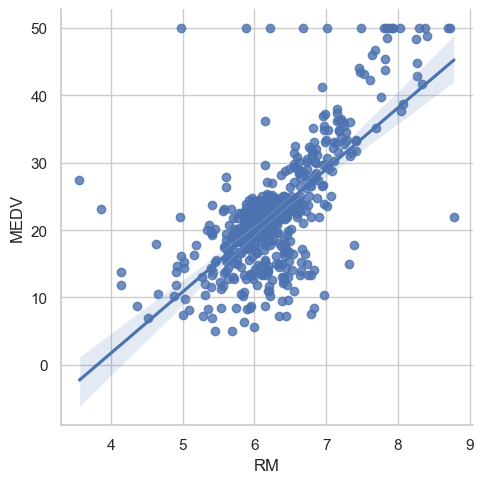

In [39]:
# Same plot but using seaborn

sns.lmplot(x='RM', y='MEDV', data=data)
plt.show()

## Plot everyting with pairplot

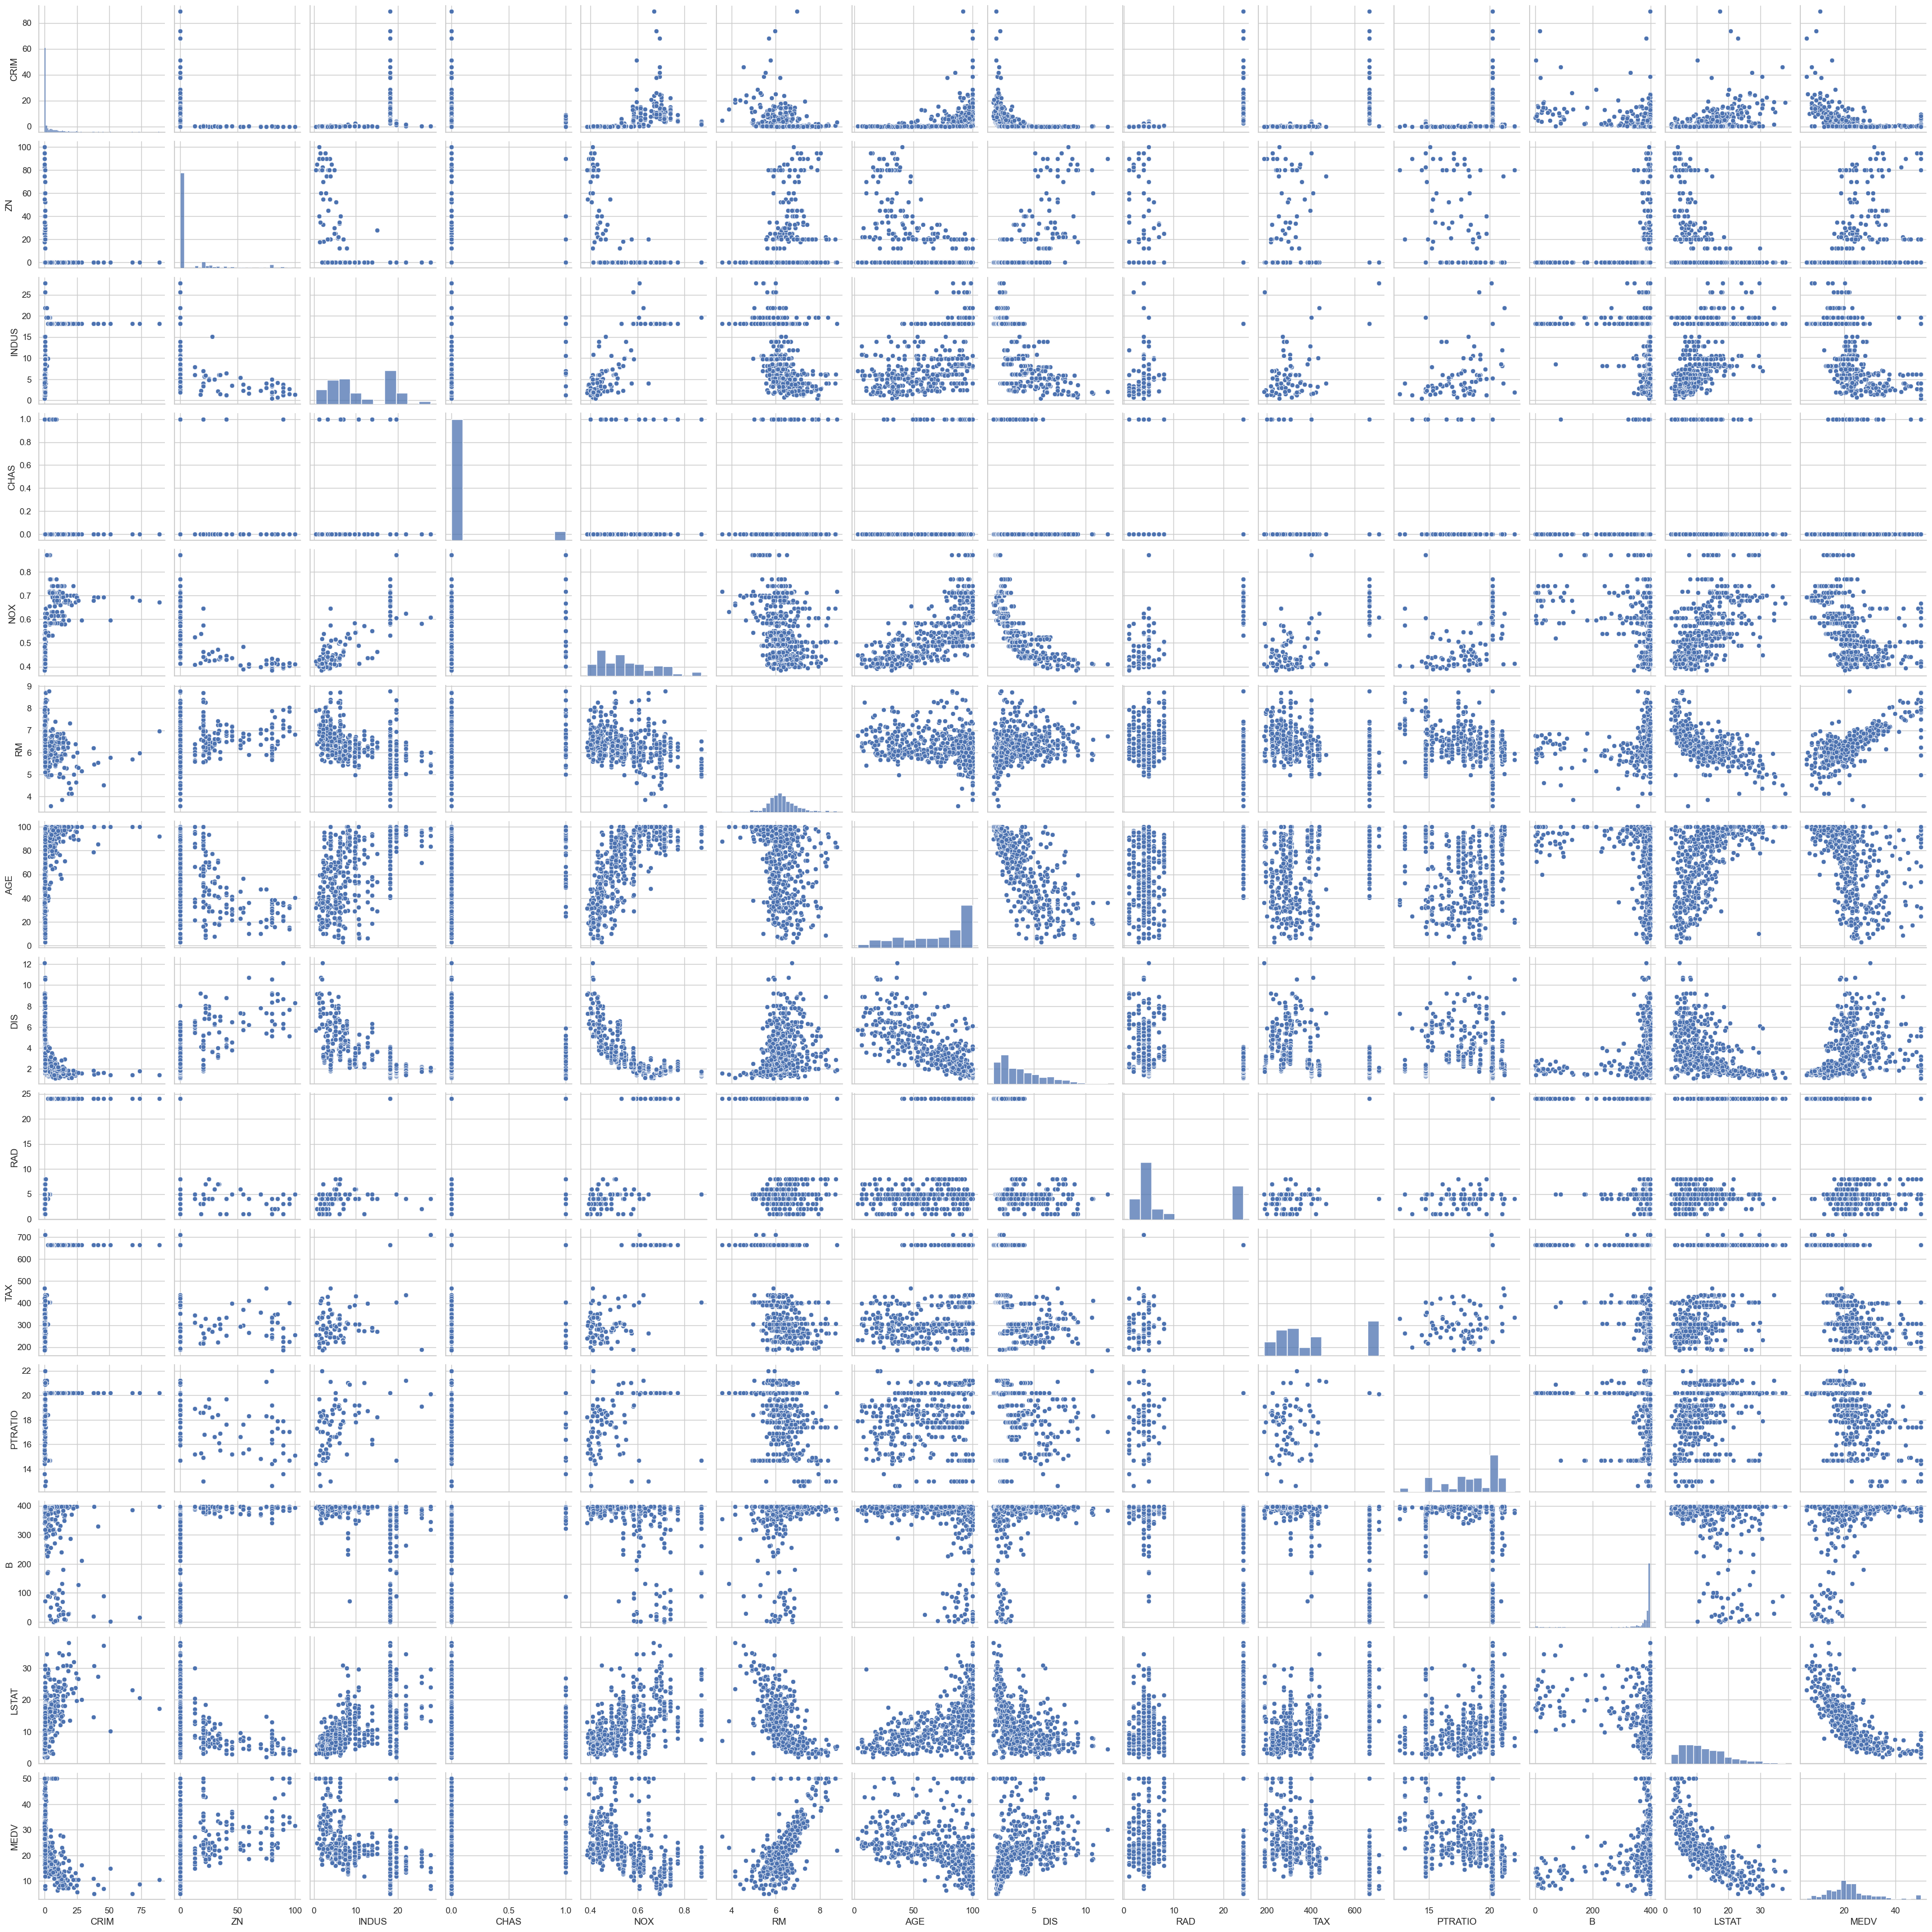

In [40]:
# Diagonal = histograms
# The rest are scatterplots
sns.pairplot(data)
plt.show()

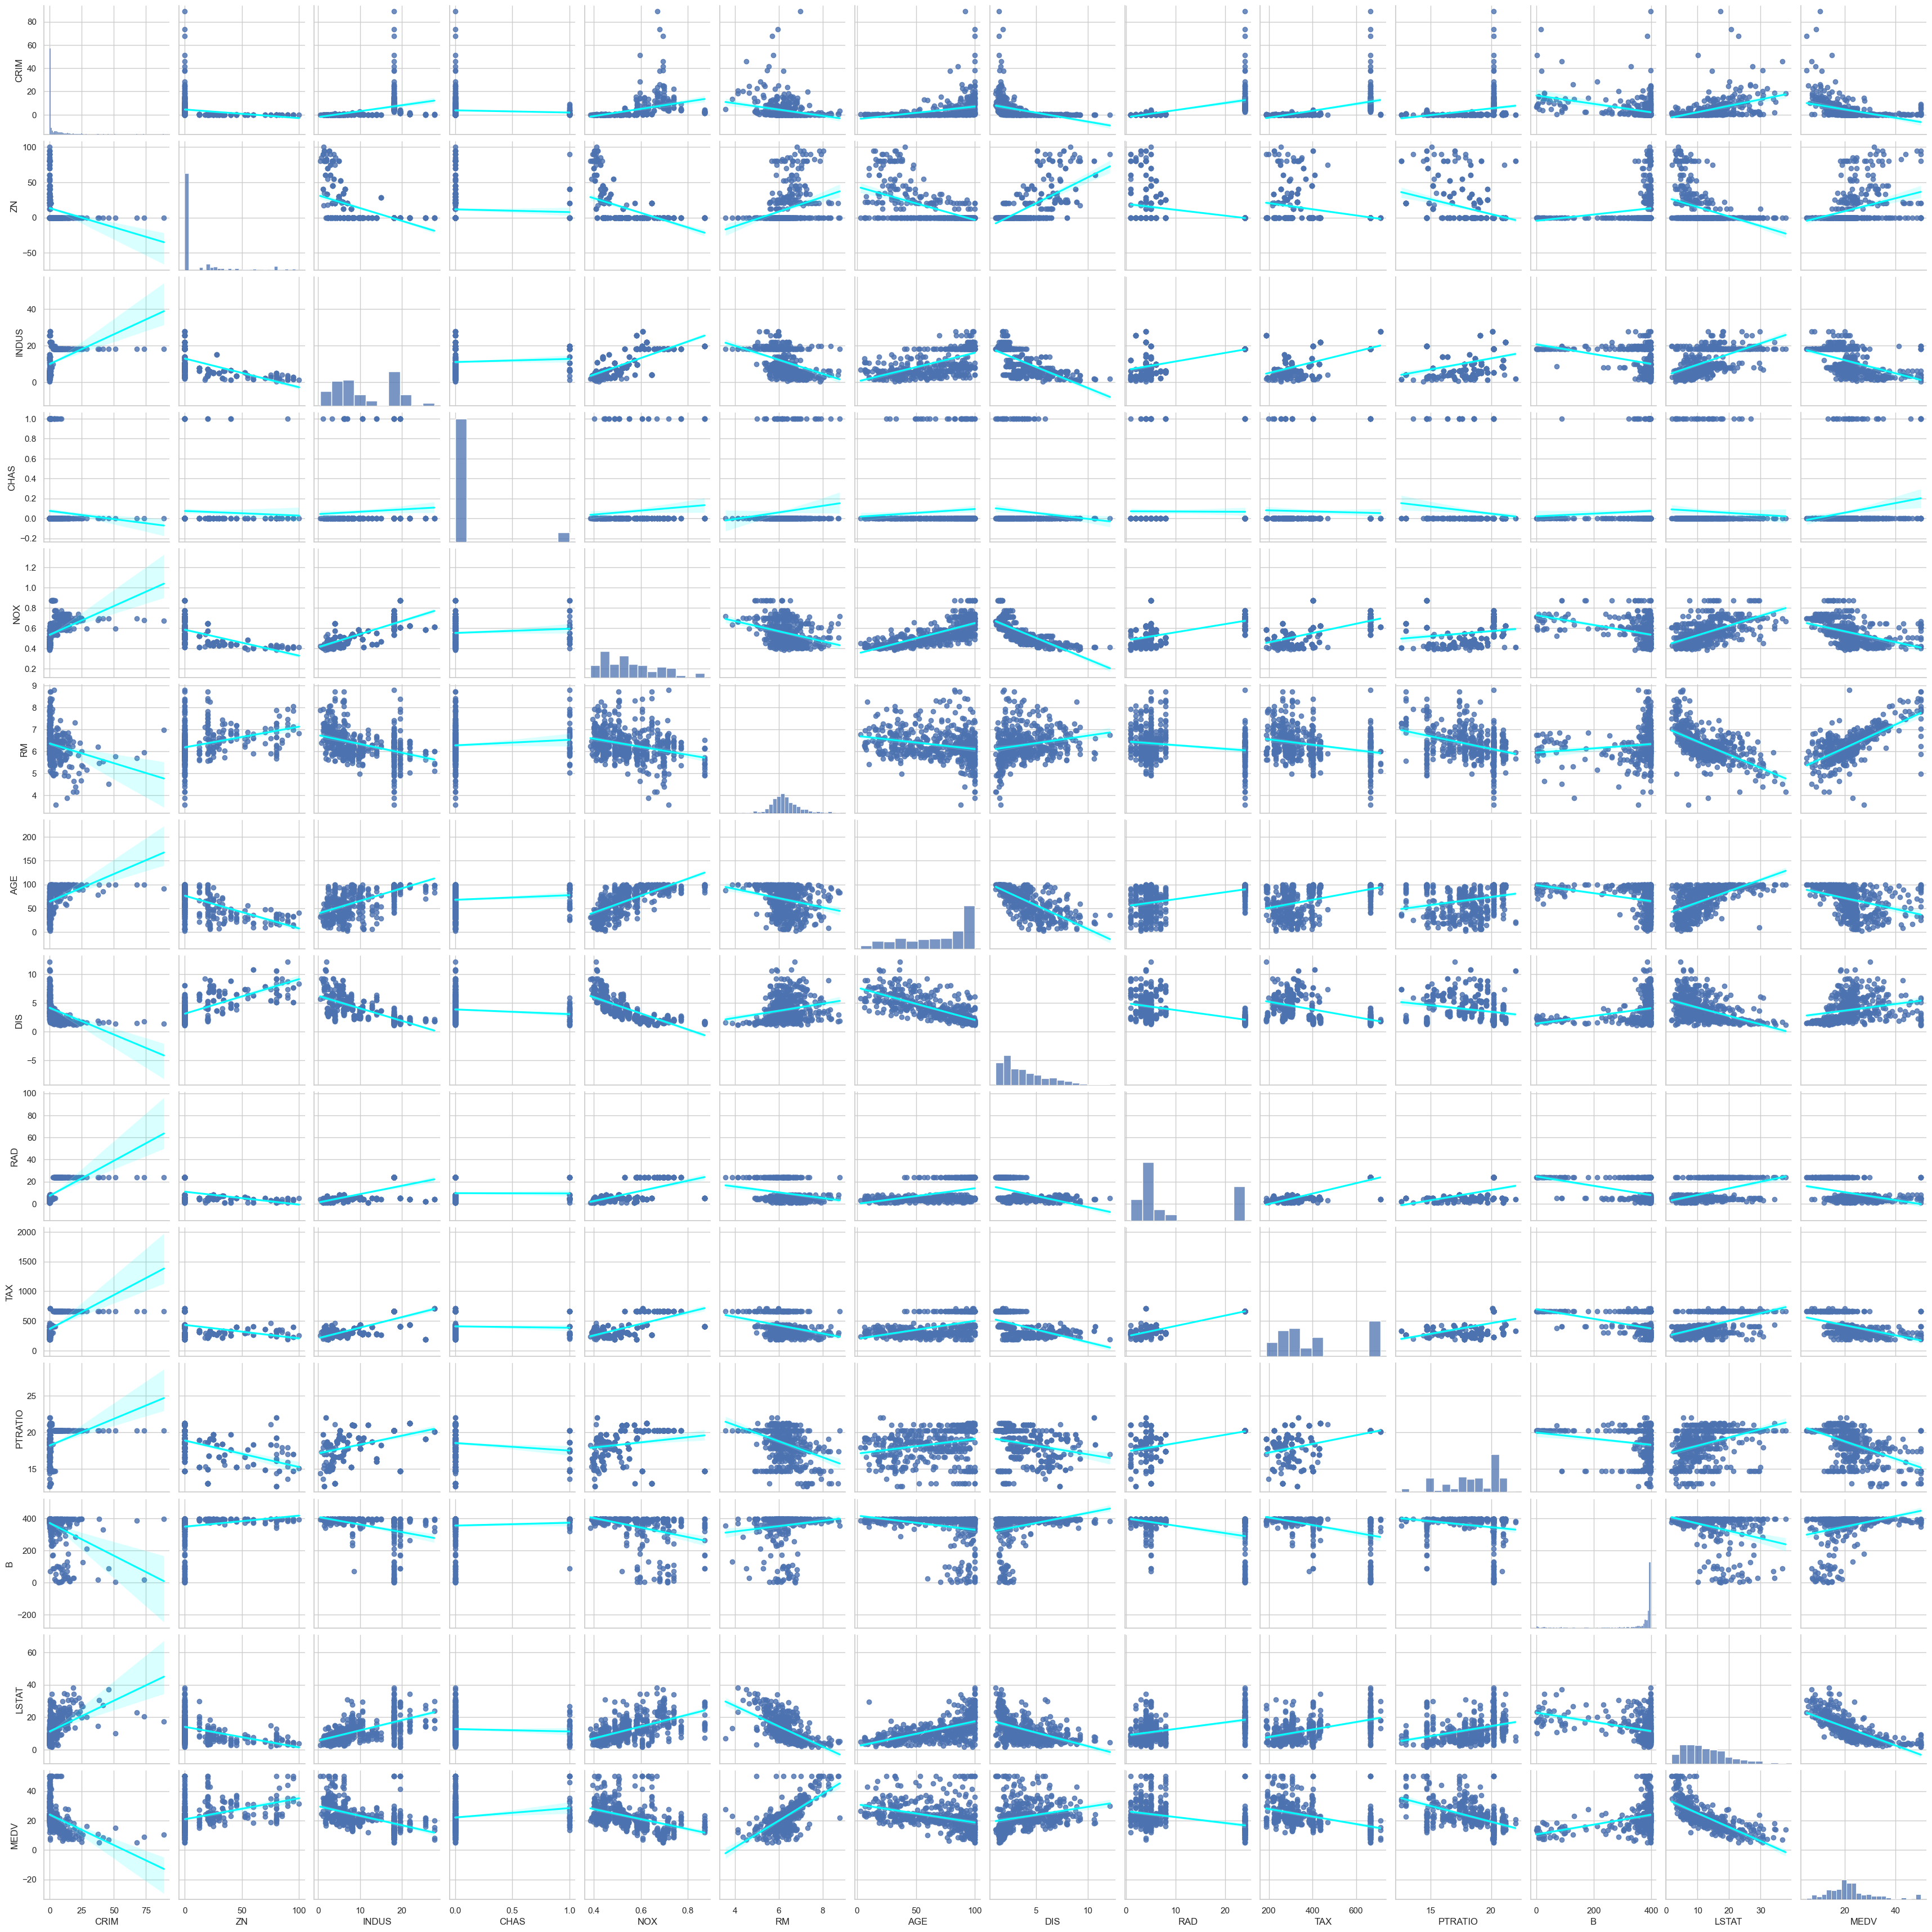

In [41]:
# Pairplots with regression line
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training and Test Dataset Split


In [42]:
prices = data['MEDV']
# Keep all columns except MEDV
features = data.drop('MEDV', axis=1)

# from sklearn.model_selection import train_test_split
# This function will return 4 values: X_train, X_test, Y_train, Y_test

# Tuple unpacking to be done
# test_size means proportion of the total dataset that will be test data
# Shuffling is done automatically but a state can be provided for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)


# % of training set 
len(X_train)/len(features)


0.7984189723320159

In [43]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Running a Multivariable Regression


In [44]:
# from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train) # Training features, and training targets

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])


Intercept 36.53305138282413


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## How to Calculate the Model Fit with R-squared

In [45]:
# Challenge: print out r-squared for training and test datasets
print('R-Squared of training data:', regr.score(X_train, y_train))
print('R-Squared of test data:', regr.score(X_test, y_test))



R-Squared of training data: 0.750121534530608
R-Squared of test data: 0.6709339839115624


## Data Transformations

In [55]:
# Skew:
# 0 = normal distribution
# positive number = skews right
# negative number = skews left
data['MEDV'].skew() # Pretty bad skew

1.1080984082549072

C:\Users\tanic\AppData\Local\Temp\ipykernel_22412\2423180468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV'], color='red')


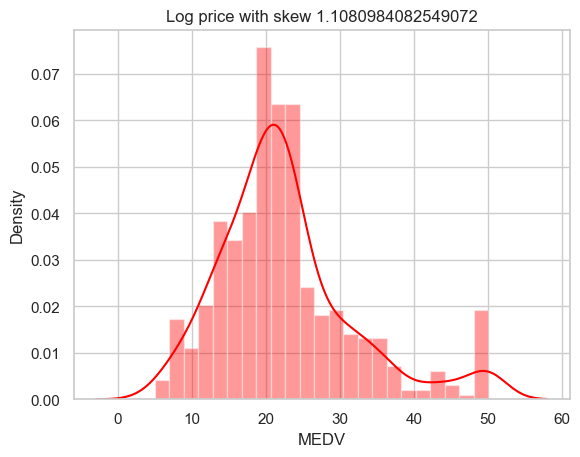

In [59]:
sns.distplot(data['MEDV'], color='red')
plt.title(f"Log price with skew {data['MEDV'].skew()}")
plt.show()


### Log transformation

In [52]:
y_log =  np.log(data['MEDV'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: MEDV, dtype: float64

In [50]:
y_log.skew()

-0.33032129530987864

C:\Users\tanic\AppData\Local\Temp\ipykernel_22412\1799364414.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


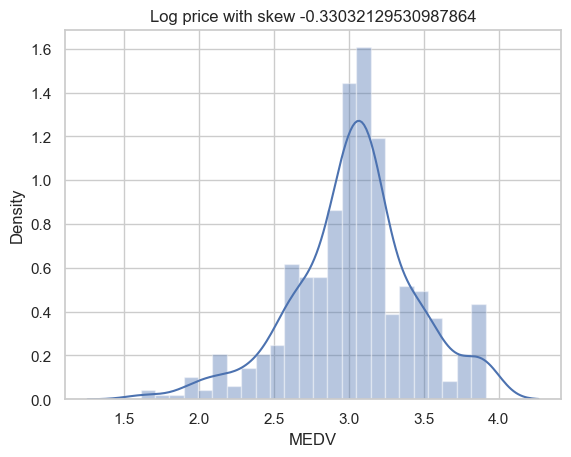

In [54]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()


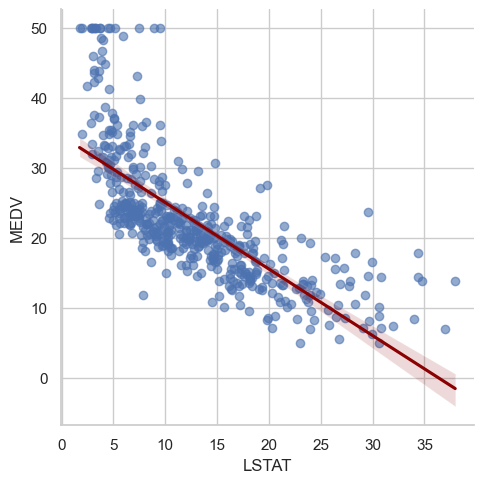

In [60]:
# Scatter plot with regression line
sns.lmplot(x='LSTAT', y='MEDV', data=data,
            scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

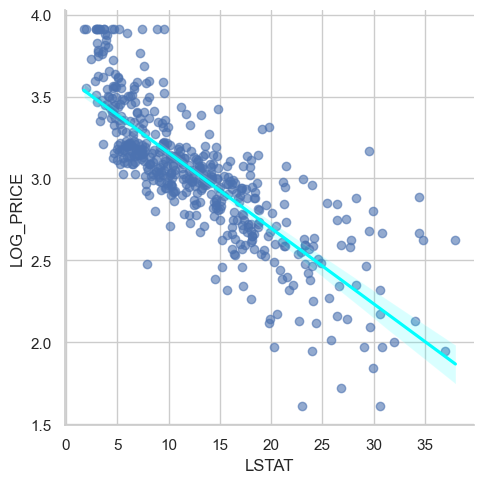

In [61]:
# Scatter plot with regression line
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data,
            scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log prices

In [75]:
prices = np.log(data['MEDV']) # Use log prices
# Keep all columns except MEDV
features = data.drop('MEDV', axis=1)

# from sklearn.model_selection import train_test_split
# This function will return 4 values: X_train, X_test, Y_train, Y_test

# Tuple unpacking to be done
# test_size means proportion of the total dataset that will be test data
# Shuffling is done automatically but a state can be provided for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

# from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train) # Training features, and training targets

print('R-Squared of training data:', regr.score(X_train, y_train))
print('R-Squared of test data:', regr.score(X_test, y_test))
print('Intercept', regr.intercept_)
regr_results = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
regr_results


R-Squared of training data: 0.7930234826697583
R-Squared of test data: 0.7446922306260735
Intercept 4.059943871775191


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

Log Transformation:
$$ \log_{e}(12) \approx 2.485 $$
Reverse Log Transformation:
$$ e^{2.485} \approx 12 $$

In [76]:
# Charles River Propert Premium
np.e**regr_results['coef']['CHAS'] # results, column, row
#Interpretation: 
# Living close to the river increases house price by 1.08 *$1000. 

1.083645185869636

## p-values & Evaluating Coefficients

In [82]:
#import statsmodels.api as sm

#Regression will be done with this module as well. 
X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Squares
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Shows thetas
#results.params
# results.pvalues
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

#p-values > 0.05 are not statistically significant. 

coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12}LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [89]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variance_inflation_factor(exog=X_incl_const, exog_idx=1)
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.714525044393249

In [102]:
# Get VIF of all columns
# Challenge: print out the number of clumns in X_incl_const
# Two methods
print(len(X_incl_const.columns))

X_incl_const.shape[1]

int

In [103]:
# Challenge: wtite a for loop that prints out all the VIFs for all the features
for i in range(len(X_incl_const.columns)):
    print(variance_inflation_factor(exog=X_incl_const, exog_idx=i))
print('All done.')


597.5487126763895
1.714525044393249
2.3328224265597597
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.3386713255364715
2.812544292793036
All done.


In [104]:
# Capture the output into a list
vif = []
for i in range(len(X_incl_const.columns)):
    vif.append(variance_inflation_factor(exog=X_incl_const, exog_idx=i))
print(vif)


[597.5487126763895, 1.714525044393249, 2.3328224265597597, 3.943448822674636, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


## List Comprehension

In [110]:
# Same as above. List comprehension
vif = [(variance_inflation_factor(exog=X_incl_const, exog_idx=i)) for i in range(len(X_incl_const.columns))]
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif':np.round(vif,2)})

# VIF > 10 is problematic or > 5 for some statisticians

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification & the BIC

In [113]:
# Original model with log prices and all features 
X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Squares
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697583


In [114]:
# Reduced model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

# OLS = Ordinary Least Squares
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591185
r-squared is 0.7927126289415164


In [115]:
# Reduced model #2 excluding INDUS and age
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

# OLS = Ordinary Least Squares
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.499342942247
r-squared is 0.7918657661852817
